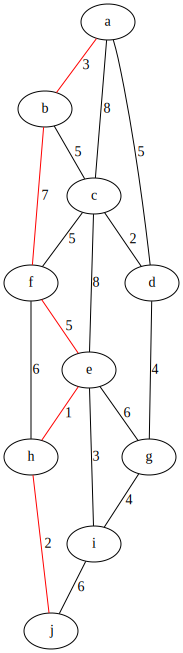

In [34]:
from cProfile import label
from cmath import nan
from hashlib import new
from nntplib import ArticleInfo
import networkx as nx
import graphviz
import numpy as np

G = nx.Graph()

caminos=[]
pisados=[]


matriz=[
    [0,10,3,0,0],
    [10,0,2,1.5,0],
    [3,2,0,1,6],
    [0,1.5,1,0,5],
    [0,0,6,5,0]
];


matriz=[
    [0,3,8,5,0,0,0,0,0,0],
    [3,0,5,0,0,7,0,0,0,0],
    [8,5,0,2,8,5,0,0,0,0],
    [5,0,2,0,0,0,4,0,0,0],
    [0,0,8,0,0,5,6,1,3,0],
    [0,7,5,0,5,0,0,6,0,0],
    [0,0,0,4,6,0,0,0,4,0],
    [0,0,0,0,1,6,0,0,0,2],
    [0,0,0,0,3,0,4,0,0,6],
    [0,0,0,0,0,0,0,2,6,0]
];


def dijkstra(punto=nan,final=nan, camino=[], contador=nan,pisadas=[], peso=0):
    if (punto==final):
        camino.append(punto)
        camino.append(peso)
        caminos.append(camino)
    
    
        return;
  
   
    if contador%2==1:
        newcontador=contador+1;
        #incremento en y
        pisadas.append(punto)
        for i in range (len(matriz)):
            if(matriz[punto][i]!=0) and i not in pisadas:
           
                newcomino=camino.copy()
                newcomino.append(punto)
                newpisadas=pisadas.copy()
                newpeso=peso+matriz[punto][i]
                
                dijkstra(punto=i,final=final,camino=newcomino,contador=newcontador,pisadas=newpisadas, peso=newpeso);
           
        
    else:
        #incremento en x
        
        newcontador=contador+1;
        pisadas.append(punto)
        for i in range (len(matriz[0])):
            
            if(matriz[i][punto]!=0)  and i not in pisadas:

                newcomino=camino.copy()
                newcomino.append(punto)
                newpisadas=pisadas.copy()
                newpeso=peso+matriz[i][punto]
           
                dijkstra (punto=i,final=final,camino=newcomino,contador=newcontador,pisadas=newpisadas, peso=newpeso);
            
        

    



dijkstra(punto=0,final=9,contador=1)
# dijkstra(punto=0,final=4,contador=1)


min=float("inf")
minCamino=nan;

for item in caminos:
    if(item[-1]<min):
        min=item[-1]
        minCamino=item;
        
minCamino.pop()


for n in range(len(matriz)):
    for i in range(len(matriz[n])):
        if matriz[n][i]>0:
            G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]))
for n in range(len(matriz)):
    G.add_node(chr(97+n))
for n in range(len(matriz)):
    for i in range(len(matriz[n])):
        if matriz[n][i]>0:
            if n in minCamino and i in minCamino:
                if (minCamino.index(i) + 1 ==minCamino.index(n)) or (minCamino.index(n) + 1 ==minCamino.index(i)):
                    G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]),color="red")
                else:
                    G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]),color="black")
            else:
                G.add_edge(chr(n+97), chr(i+97), label=str(matriz[n][i]),color="black")
A = nx.nx_agraph.to_agraph(G)
A.layout('dot')

graphviz.Source(A.to_string()) 
# A.draw('salida.png') # guardar como png

In [30]:
from cProfile import label
from nntplib import ArticleInfo
from turtle import color
import networkx as nx
import graphviz
import numpy as np
G = nx.Graph()
adayacente=[
    [0,10,3,0,0],
    [10,0,2,1.5,0],
    [3,2,0,1,6],
    [0,1.5,1,0,5],
    [0,0,6,5,0]
];

adayacente=[
    [0,3,8,5,0,0,0,0,0,0],
    [3,0,5,0,0,7,0,0,0,0],
    [8,5,0,2,8,5,0,0,0,0],
    [5,0,2,0,0,0,4,0,0,0],
    [0,0,8,0,0,5,6,1,3,0],
    [0,7,5,0,5,0,0,6,0,0],
    [0,0,0,4,6,0,0,0,4,0],
    [0,0,0,0,1,6,0,0,0,2],
    [0,0,0,0,3,0,4,0,0,6],
    [0,0,0,0,0,0,0,2,6,0]
];

for n in range(len(adayacente)):
    for i in range(len(adayacente[n])):
        if adayacente[n][i]>0:
            G.add_edge(chr(n+97), chr(i+97), label=str(adayacente[n][i]))
for n in range(len(adayacente)):
    G.add_node(chr(97+n))
for n in range(len(adayacente)):
    for i in range(len(adayacente[n])):
        if adayacente[n][i]>0:
            G.add_edge(chr(n+97), chr(i+97), label=str(adayacente[n][i]))

A = nx.nx_agraph.to_agraph(G)
A.layout('dot')

graphviz.Source(A.to_string()) 
# A.draw('salida.png') # guardar como png